In [ ]:
!pip install vaderSentiment

In [ ]:
! pip install PyDrive

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re

In [ ]:
df = pd.read_csv("Train_Dec.csv")

In [ ]:
df

,text
0,@Alyssafarah They started the armed conflict a...
1,Tucker Carlson emphasized on how much Ukraine ...
2,"Since day one, the military fighting against U..."
3,A notable Russian OSS developer promotes a pro...
4,US believes Russia could invade Ukraine ‘as so...
...,...
56126,@20committee Russia could roll through Ukraine...
56127,Russia Preparing 175K Troops For Ukraine Offen...
56128,"@politicalblond In other words, Russia is Male..."
56129,How the US Military Could Mobilize If Russia I...


In [ ]:
df['text'] = df['text'].astype('str') 

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [ ]:
df['text'] = clean_tweets(df['text'])

In [ ]:
df['text'].head()

0     They started the armed conflict after Obama/B...
1    Tucker Carlson emphasized on how much Ukraine ...
2    Since day one, the military fighting against U...
3    A notable Russian OSS developer promotes a pro...
4    US believes Russia could invade Ukraine ‘as so...
Name: text, dtype: object

In [ ]:
scores = []

# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['text'].shape[0]):
    #print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyser.polarity_scores(df['text'][i])["compound"]
    pos = analyser.polarity_scores(df['text'][i])["pos"]
    neu = analyser.polarity_scores(df['text'][i])["neu"]
    neg = analyser.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)

In [ ]:
df.head(10)

,text,Compound,Positive,Negative,Neutral
0,They started the armed conflict after Obama/B...,-0.7902,0.000,0.174,0.826
1,Tucker Carlson emphasized on how much Ukraine ...,0.2003,0.082,0.051,0.866
2,"Since day one, the military fighting against U...",-0.0516,0.047,0.051,0.902
3,A notable Russian OSS developer promotes a pro...,0.0258,0.095,0.093,0.812
4,US believes Russia could invade Ukraine ‘as so...,0.0000,0.000,0.000,1.000
5,"BTW, thanks to for reminder\n\nBack in 2003 U...",-0.8957,0.049,0.230,0.721
6,Russia planning massive military offensive aga...,-0.0772,0.177,0.251,0.571
7,UK Tory’s failed the Afghan’s providing essent...,-0.8205,0.048,0.189,0.763
8,"Ukraine shows off US-made weapons, material am...",-0.8316,0.000,0.444,0.556
9,Russia reveals what Putin asked of Biden,0.0000,0.000,0.000,1.000


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,text,Compound,Positive,Negative,Neutral,Sentiment
0,They started the armed conflict after Obama/B...,-0.7902,0.000,0.174,0.826,Negative
1,Tucker Carlson emphasized on how much Ukraine ...,0.2003,0.082,0.051,0.866,Positive
2,"Since day one, the military fighting against U...",-0.0516,0.047,0.051,0.902,Negative
3,A notable Russian OSS developer promotes a pro...,0.0258,0.095,0.093,0.812,Neutral
4,US believes Russia could invade Ukraine ‘as so...,0.0000,0.000,0.000,1.000,Neutral


In [ ]:
df.to_csv('Train_Dec_VADER.csv')

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of                                                     text  Compound  Positive  \
0       They started the armed conflict after Obama/B...   -0.7902     0.000   
1      Tucker Carlson emphasized on how much Ukraine ...    0.2003     0.082   
2      Since day one, the military fighting against U...   -0.0516     0.047   
3      A notable Russian OSS developer promotes a pro...    0.0258     0.095   
4      US believes Russia could invade Ukraine ‘as so...    0.0000     0.000   
...                                                  ...       ...       ...   
56126   Russia could roll through Ukraine in a matter...    0.0258     0.061   
56127  Russia Preparing 175K Troops For Ukraine Offen...    0.0258     0.181   
56128   In other words, Russia is Male and Ukraine is...    0.0000     0.000   
56129  How the US Military Could Mobilize If Russia I...    0.0000     0.000   
56130  “The U.S. and NATO reject Putin’s demands that...    0.5719     0.166   


In [ ]:
table = df.groupby('Sentiment').count()

In [ ]:
!pip install dataframe-image
import dataframe_image as dfi

In [ ]:
df_styled = table.style.background_gradient()
dfi.export(df_styled,"Sentiment_analysis_Table_Dec_Train.png")

/opt/anaconda3/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0419/203900.278941:INFO:headless_shell.cc(659)] Written to file /var/folders/lr/vzz089755mbdp247s0x54vmr0000gn/T/tmpq9si7wv_/temp.png.


In [ ]:
import matplotlib.pyplot as plt


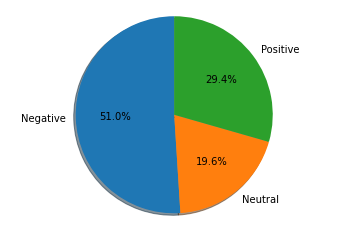

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Neutral', 'Positive'
sizes = [28627, 10982, 16522]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Sentiment_Analysis_Dec_Train.png')
plt.show()
